# Predicción del abandono (burnout) de empleados

- Eduardo Rodríguez Sánchez   -   100451243
- Inés Romero González    -   100451155

## Índice

1. [Introducción](#Introducción)
2. [EDA](#EDA)

## Introducción

La predicción del abandono de empleados es un problema común en el campo de la gestión de recursos humanos. En estos problemas, se predice qué empleados tienen más probabilidad de abandonar la empresa en un futuro cercano. Las predicciones obtenidas son importantes para que las empresas puedan tomar medidas y mantengan a sus mejores empleados. En este notebook, se aborda la tarea de predecir qué empleados tienen una mayor probabilidad de dejar la empresa. Para ello, se aplicarán técnicas de aprendizaje automático.

El objetivo final es construir un modelo preciso que pueda utilizarse para realizar predicciones futuras y ayudar a la empresa a tomar medidas para mantener a sus empleados de mayor valor.

## EDA
### Carga de datos

In [39]:
import pickle
import pandas as pd
import numpy as np

# Load the model
with open('attrition_available_4.pkl', 'rb') as f:
    data = pd.read_pickle(f)

### Exploración incial de los datos

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 1 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      3671 non-null   float64
 1   absences                 3681 non-null   float64
 2   JobInvolvement           3594 non-null   float64
 3   PerformanceRating        3676 non-null   float64
 4   EnvironmentSatisfaction  3444 non-null   float64
 5   JobSatisfaction          4390 non-null   float64
 6   WorkLifeBalance          3488 non-null   float64
 7   Age                      3689 non-null   float64
 8   Attrition                4410 non-null   object 
 9   BusinessTravel           3644 non-null   object 
 10  Department               3575 non-null   object 
 11  DistanceFromHome         3476 non-null   float64
 12  Education                3467 non-null   float64
 13  EducationField           3596 non-null   object 
 14  EmployeeCount            4410

Como podemos observar del resumen anterior, nuestro dataset está compuesto de 30 columnas y 4410 filas. De estas 31 columnas, la número 8 *Attrition* es la que queremos predecir, ya que es la que nos indica si el empleado ha abandonado la empresa o no. El resto de columnas son las características de los empleados que utilizaremos para predecir si abandonarán o no la empresa.

Contamos con diversos tipos de datos, como son: enteros, flotantes, booleanos y cadenas de caracteres. Esto supone un problema, ya que la mayoría de algoritmos de aprendizaje automático no son capaces de trabajar con variables categóricas como las cadenas de caracteres. Por ello, debemos hacer el correspondiente tratamiento de los datos previo a la aplicación de los algoritmos.

A continuación realizaremos un estudio más en profundidad para conocer mejor los atributos con los que estaremos trabajando a lo largo del proyecto.

In [41]:
# Separate 10 first columns from the rest
data1 = data.iloc[:, 0:10]
data2 = data.iloc[:, 10:20]
data3 = data.iloc[:, 20:]


In [42]:
data1.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel
1,NaN,13.0,2.0,4.0,3.0,2.0,NaN,31.0,Yes,Travel_Frequently
6,6.450877,17.0,3.0,4.0,NaN,3.0,NaN,28.0,Yes,Travel_Rarely
13,8.871421,14.0,2.0,NaN,1.0,2.0,2.0,47.0,Yes,Non-Travel
28,10.713066,6.0,NaN,3.0,4.0,3.0,1.0,44.0,Yes,Travel_Frequently
30,9.662808,11.0,NaN,3.0,1.0,2.0,3.0,26.0,Yes,Travel_Rarely


In [43]:
data2.head()

,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus
1,Research & Development,10.0,NaN,Life Sciences,1,NaN,Female,1.0,Research Scientist,Single
6,Research & Development,11.0,2.0,Medical,1,7.0,Male,2.0,Sales Executive,NaN
13,Research & Development,NaN,NaN,NaN,1,14.0,Male,1.0,Research Scientist,Married
28,NaN,1.0,NaN,Medical,1,NaN,Male,2.0,Research Scientist,Divorced
30,Research & Development,NaN,3.0,Medical,1,NaN,Male,3.0,Research Scientist,NaN


In [44]:
data3.head()

,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,41890.0,0.0,Y,23,8.0,1.0,6.0,NaN,5.0,1.0,4.0
6,58130.0,2.0,Y,20,8.0,1.0,5.0,NaN,0.0,0.0,0.0
13,57620.0,1.0,Y,11,NaN,2.0,10.0,4.0,10.0,9.0,9.0
28,103330.0,3.0,Y,14,8.0,NaN,19.0,2.0,1.0,0.0,NaN
30,68540.0,2.0,Y,11,NaN,0.0,5.0,NaN,3.0,0.0,2.0


In [45]:
data.describe()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,3671.000000,3681.000000,3594.000000,3676.000000,3444.000000,4390.000000,3488.000000,3689.000000,3476.000000,3467.000000,...,3671.000000,3600.000000,4410.000000,3596.0,3572.000000,4401.000000,3674.000000,3625.000000,3569.000000,3529.000000
mean,7.304060,12.744906,2.732332,3.157236,2.722706,2.728246,2.753440,36.966929,9.293153,2.914335,...,65846.248978,2.692222,15.209524,8.0,0.796473,11.279936,2.788786,7.003862,2.210703,4.090677
std,1.325198,5.506406,0.709073,0.364073,1.096583,1.101253,0.710033,9.175234,8.150955,1.017952,...,47568.463352,2.488037,3.659108,0.0,0.854762,7.782222,1.281303,6.177425,3.255280,3.572499
min,5.424757,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.266983,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,...,29330.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,7.002454,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,...,49680.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,7.891257,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,...,85920.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,10.937261,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [46]:
# Count the number of missing values in each column
data.isnull().sum()

hrs                        739
absences                   729
JobInvolvement             816
PerformanceRating          734
EnvironmentSatisfaction    966
JobSatisfaction             20
WorkLifeBalance            922
Age                        721
Attrition                    0
BusinessTravel             766
Department                 835
DistanceFromHome           934
Education                  943
EducationField             814
EmployeeCount                0
EmployeeID                 764
Gender                     785
JobLevel                   814
JobRole                    865
MaritalStatus              742
MonthlyIncome              739
NumCompaniesWorked         810
Over18                     857
PercentSalaryHike            0
StandardHours              814
StockOptionLevel           838
TotalWorkingYears            9
TrainingTimesLastYear      736
YearsAtCompany             785
YearsSinceLastPromotion    841
YearsWithCurrManager       881
dtype: int64

Como podemos observar de la información mostrada anterioremente, todas las variables tienen valores nulos, excepto la variable de respuesta *Attrition* y las variables *EmployeeCount* y *PercentSalaryHike*. Por ello, más adelante, se realizará un tratamiento de los datos para gestionar estos valores nulos.

Podemos clasificar las variables de la siguiente manera:
- Números reales: *hrs*, 
- Cadenas de caracteres: *Attrition*, *BussinessTravel*, *Department*, *EducationField*, *Gender*, *JobRole*, *MaritalStatus*, *Over18*. 
- Ordinales: *JobInvolvement*, *PerformanceRating*, *EnviromentSatifaction*, *JobSatisfaction*, *WorkLifeBalance*, *Education*, *JobLevel*, *StockOptionLevel*.
- Números enteros: *Absences*, *Age*, *DistanceFromHome*, *EmployeeCount*, *EmployeeID*, *MonthlyIncome*, *NumCompaniesWorked*, *PercentSalaryHike*, *StandardHours*, *TotalWorkingYears*, *TrainingTimesLastYear*, *YearsAtCompany*, *YearsSinceLastPromotion*, *YearsWithCurrManager*.

Tanto las cadenas de caracteres como los ordinales son variables categoricas, por lo que deberemos realizar un tratamiento de los datos para poder trabajar con ellas.

Algunas las variables de nuestros datos pueden tener valores que no aporten información relevante para el problema, como son las varaibles *EmployeeCount*, *EmployeeID*, *Over18*, *StandardHours*. A continuación explicaremos el motivo por el que estas variables no son importantes para el problema.

In [47]:
# Average value of the column EmployeeCount 
print("Número de empleados:", data["EmployeeCount"].mean())

# Max and min number of employees ID
print("Rango de IDs", data["EmployeeID"].max() - data["EmployeeID"].min())

# Calculate how many values of Over18 are Y
print("Número de mayores de edad:", data["Over18"].value_counts()[0])
print("Número de menores de edad:", int(data["Over18"].value_counts() - data["Over18"].value_counts()[0]))

# Average value of the column StandardHour
standard_hours = data["StandardHours"].unique()
standard_hours = standard_hours[~pd.isnull(standard_hours)]
print("Horas estándar de los diferentes empleados:", int(standard_hours))

Número de empleados: 1.0
Rango de IDs 4407.0
Número de mayores de edad: 3553
Número de menores de edad: 0
Horas estándar de los diferentes empleados: 8


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14012\558999649.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Número de menores de edad:", int(data["Over18"].value_counts() - data["Over18"].value_counts()[0]))


Como podemos observar, las columnas de *EmployeeCount*, *StandardHours*, *Over18* tienen un único valor para todas las filas (sin tener en cuenta los valores nulos). Además, podemos deducir de manera lógica que la columna *EmployeeID* tampoco aporta información relevante para el problema, ya que el identificador de un empleado no influye en su decisión de abandonar la empresa.

Con esta información recopilada, podemos proceder a eliminar estas columnas del dataset.

In [48]:
# Erase EmployeeCount, EmployeeID, Over18 and StandardHours columns
data = data.drop(["EmployeeCount", "EmployeeID", "Over18", "StandardHours"], axis=1)

Ahora analizaremos la proporción de valores nulos de cada variable para identificar qué variables tienen un mayor número de valores faltantes. Esta información es importante ya que los valores nulos pueden afectar a la creación de los modelos, como por ejemplo, causando sobreajuste o reduciendo la precisión del modelo. 

En nuestro problema consideraremos una columna como no válida si el porcentaje de valores nulos supera el umbral del 25%. No hay un porcentaje de valores nulos "ideal" que se pueda aplicar universalmente, nosotros hemos considerando un 25% ya que no tenemos tantos datos como para permitirnos eliminar más columnas.

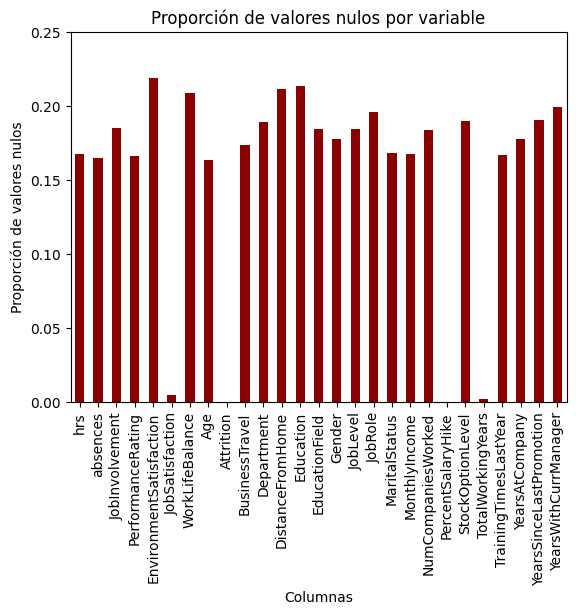

In [49]:
import matplotlib.pyplot as plt


# Calculate the proportion of missing values in each column
proporciones_nulos = data.isnull().mean()

# Create a bar plot of those columns
proporciones_nulos.plot(kind='bar', color='darkred')

# Add labels and title
plt.xlabel('Columnas')
plt.ylabel('Proporción de valores nulos')
plt.title('Proporción de valores nulos por variable')

plt.yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
plt.show()

Ya habíamos mencionado previamente que las variables *Attrition* y *PercentSalaryHike* no tenían valores nulos y esto se puede comprobar observando el gráfico. Además, no será necesario eliminar ninguna variable adicional, ya que no se supera el umbral del 25% de valores nulos que establecimos previamente.

En cuanto al resto de variables, exceptuando las variables *JobSatisfaction* y *TotalWorkingYears*, todas tienen una proporción de valores nulos de entre el 15-22%. Teniendo esto en cuenta, deberemos tomar medidas para manejar estos datos faltantes (ya sea imputando los valores faltantes o utilizando técnicas de modelado que sean resistentes a valores faltantes) para asegurarnos de que no afecten significativamente a las predicciones de nuestro modelo.

Una vez realizado el análisis exploratorio de datos, podemos asegurar que estamos ante un problema de clasificación, ya que la variable de respuesta es binaria (2 clases), es decir, un empleado o se queda en la empresa o se va de esta. 

En cuanto a si el problema está desbalanceado o no, por definición los problemas de burnout son desbalanceados ya que debería haber un mayor número de empleados que se quedan en la empresa que aquellos que deciden marcharse. Para asegurarnos de esto, comprobaremos la proporción de aquellos empleados que deciden quedarse frente a aquellos que deciden marcharse.

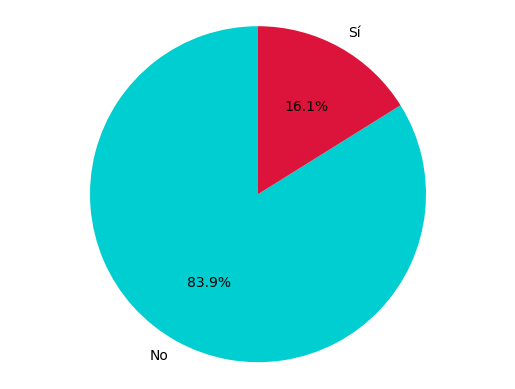

In [50]:
# Calculate the proportion of yes/no values in the Attrition column
counts = data['Attrition'].value_counts()
sizes = [counts[0], counts[1]]

# Create the pie chart
labels = ['No', 'Sí']
colors = ['darkturquoise', 'crimson']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Show the plot
plt.axis('equal')
plt.show()

Como podemos observar, hay una gran mayoría de empleados que deciden no dejar la empresa, por lo tanto podemos asegurar que el problema está desbalanceado. Podemos abordar este problema mediante diferentes técnicas como el generación de datos sintéticos, el submuestreo de la clase mayoritaria, métodos de clasificación basados en coste y añadiendo pesos a las clases.

Tanto el tratamiento de valores nulos, como el tratamiento de variables categóricas y el balanceo de clases se realizarán en la sección de preprocesamiento de datos, a través de pipelines.
# Constucción de modelos
## Partición de los datos

Como ya hemos mencionado anteriormente, estamos ante un problema desbalanceado y por lo tanto, para llevar a cabo la partición de los datos realizaremos particiones estratificadas de estos. Con estas particiones conseguiremos una distribución de clases similar a la presente en los datos originales, es decir, en estas particiones habrá un mayor número de empleados que no se van.

Para realizar estas particiones haremos lo siguiente:

In [51]:
from sklearn.model_selection import train_test_split

# Separation of the target variable
y = data["Attrition"]
X = data.drop(["Attrition"], axis=1)

# Train and test separation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=43)

## Tratamiento de valores nulos

Para tratar los valores nulos, realizaremos dos tipos de imputación:
- Una para los atributos numéricos, haciendo uso de un imputador KNN. Hemos seleccionado este métido debido a la alta dimensionalidad y la relación no lineal entre las variables.
- Otra para los atributos categóricos, la cual estará basada en la moda. Esta técnica es simple, pero efectiva, sobre todo tratadose de variables categóricas.

Estas imputaciones se realizarán a través de pipelines. Poco a poco, iremos añadiendo más pasos a estos pipelines, hasta conseguir un cadena de operaciones que realice todo el preprocesamietno de los datos acabando en el modelo de clasificación.

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

set_config(transform_output="pandas")

# Processing of numerical variables
num_imputer = Pipeline(steps=[
        ("imputer", KNNImputer(n_neighbors=5, weights="uniform"))
        ])

# Processing of categorical variables
cat_imputer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))
        ])

## Codificación de variables categóricas

Una vez nos hemos deshecho de los valores nulos, debemos tratrar las variables categóricas, ya que los algormitmos de aprendizaje automático que estaremos utilizando no son capaces de trabajar correctamente con este tipo de datos.

En primer lugar debemos analizar cuidadosamente nuestras variables categóricas, para así poder escoger el método de codfificación adecuado.

- Cadenas de caracteres: *BussinessTravel*, *Department*, *EducationField*, *Gender*, *JobRole*, *MaritalStatus*.  

In [53]:
# Get unique values of colums
cat_cols = X.select_dtypes(include="object").columns.tolist()
for col in cat_cols:
    # Print it separated by commas
    print(col.upper() + "\n" + "-"*len(col))
    # print if not nan  
    print(list(data[col].dropna().unique()), "\n")
    

BUSINESSTRAVEL
--------------
['Travel_Frequently', 'Travel_Rarely', 'Non-Travel'] 

DEPARTMENT
----------
['Research & Development', 'Human Resources', 'Sales'] 

EDUCATIONFIELD
--------------
['Life Sciences', 'Medical', 'Human Resources', 'Marketing', 'Other', 'Technical Degree'] 

GENDER
------
['Female', 'Male'] 

JOBROLE
-------
['Research Scientist', 'Sales Executive', 'Manager', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Sales Representative', 'Research Director', 'Human Resources'] 

MARITALSTATUS
-------------
['Single', 'Married', 'Divorced'] 



- *BusinessTravel*: esta variable puede ser facilmente interpretada ordinalmente, por lo que utilizaremos un codificador ordinal.
- *Department*, *EducationField*, *Gender*, *MaritalStatus*, *JobRole*: estas variables no tienen un orden natural, y además la dimensionalidad que genera no es demasiado grande, por lo que utilizaremos un codificador one-hot.

In [54]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Adding to the pipeline the encoding of categorical variables
travel_cat = [["Non-Travel", "Travel_Rarely", "Travel_Frequently"]]
ordinal_encoder = Pipeline(steps=[ ("ordinal_encoder", OrdinalEncoder(categories=travel_cat)) ])
one_hot_encoder = Pipeline(steps=[ ("one_hot_encoder", OneHotEncoder(sparse_output=False, handle_unknown='ignore')) ])


## Construcción de modelos

### Logistic Regression

El primer modelo que realizaremos será Logistic Regression, que es un algoritmo para clasificación. Este modelo de regresión logística utiliza una función sigmoide para transformar la salida de la regresión lineal en un valor entre 0 y 1, que puede ser interpretado como la probabilidad de pertenecer a la clase positiva, lo que permite establecer un umbral de decisión para la clasificación y ajustarlo según el costo de los errores de clasificación falsos positivos y falsos negativos.

Como ya hemos realizado un preprocesado de los datos, debemos centrarnos en la constucción de un pipeline completo que desemboque en el entrenamiento de nuestra regresión logística. Cabe destacar que el método de LogisticRegression se ve beneficiado por el escalado de los datos, por lo que añadiremos un escalador al pipeline. Además, no necesitaremos llevar a cabo un análisis de hiperparámetros ya que no pertenece al alcance de este trabajo.

Antes de comenzar, emplearemos el modelo dummy para saber cuál es el baremo a superar.

Balanced Accuracy: 0.5


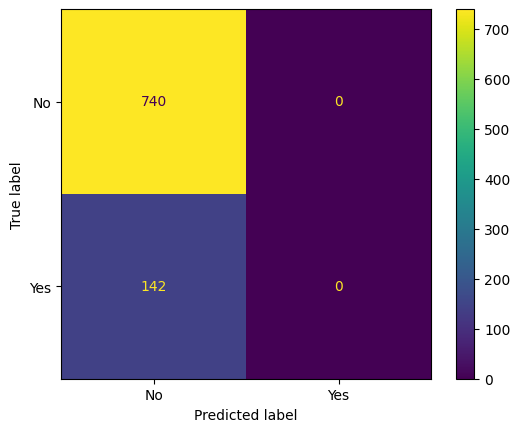

In [55]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Use the DummyClassifier to compare with the models
dummy = DummyClassifier(strategy="most_frequent", random_state=43)

# Fit the model
np.random.seed(43)
dummy.fit(X_train, y_train)


# Predict the test set
y_pred = dummy.predict(X_test)

# Get the accuracy score
accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dummy.classes_)
plt = disp.plot()



Balanced Accuracy: 0.6927959649790636


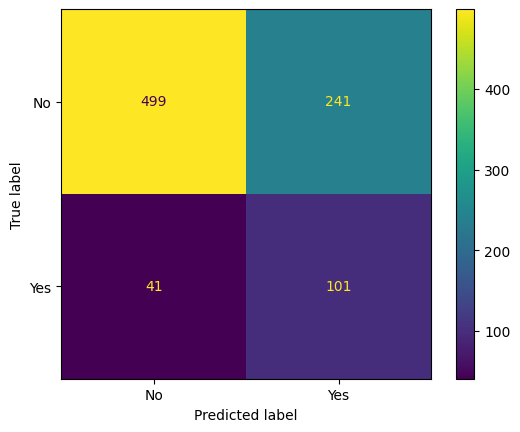

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

# Adding to the pipeline the model
model = LogisticRegression(class_weight="balanced", random_state=43)

# Creating the numeric pipeline with the scaler
numeric_pipe = Pipeline(steps=[
        ("imputer", num_imputer),
        ("scaler", RobustScaler())
        ])

# Creating the categorical pipeline with the encoders
categorical = Pipeline( steps=[
                ("imputer", cat_imputer),
                ("one_hot_encoder", one_hot_encoder),
        ])
categorical_ord = Pipeline( steps=[
                ("imputer", cat_imputer),
                ("ordinal_encoder", ordinal_encoder),
        ])

num_cols = X.select_dtypes(include="number").columns.tolist()
cat_cols = X.select_dtypes(include="object").columns.tolist()
cat_cols.remove("BusinessTravel")
ord_cols = ["BusinessTravel"]
categorical_pipe = ColumnTransformer(transformers = [
                                        ("categorial", categorical, cat_cols),
                                        ("ordinal", categorical_ord, ord_cols),
                                        ],)
# Create the column transformer for the preprocessing
preproc =  ColumnTransformer(transformers = [
                                    ("numeric", numeric_pipe, num_cols),
                                    ("categorial", categorical_pipe, cat_cols + ord_cols),
                                     ],
)

# Create the pipeline
model = LogisticRegression(class_weight="balanced", random_state=43)
pipeline_log_reg = Pipeline(steps=[
        ("preprocessing", preproc),
        ("classifier", model)
        ])

# Fit the pipelin
np.random.seed(43)
pipeline_log_reg.fit(X_train, y_train)


# Predict the test set
y_pred = pipeline_log_reg.predict(X_test)

# Calculate the accuracy on test set
accuracy = balanced_accuracy_score(y_test, y_pred)

print("Balanced Accuracy:", accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
plt = disp.plot()


Como podemos observar, el modelo de regresión logística que hemos entrenado, tiene un rendimiento  superior al modelo dummy. Esto se debe a que el modelo dummy siempre predice la clase mayoritaria, mientras que el modelo de regresión logística es capaz de aprender de los datos y realizar predicciones más acertadas.
### Boosting
Los siguiente modelos que entrenaremos serán modelos de boosting, concretamente Gradient Boosting y XGBoost. Estos modelos se basan en la idea de combinar varios modelos débiles (árboles de decisión) para formar un modelo más robusto y preciso.

En el caso de Gradient Boosting, se utiliza una estrategia de boosting aditivo en la que se ajusta secuencialmente un modelo de decisión sobre los residuos del modelo anterior, de modo que el modelo final es una suma ponderada de los modelos anteriores. 

Por otro lado, XGBoost es una técnica de boosting que utiliza una combinación de boosting aditivo y muestreo de características para mejorar el rendimiento del modelo. Además, XGBoost también utiliza una regularización Ridge y Lasso para evitar el sobreajuste y mejorar la generalización.

#### Gradient Boosting

Los modelos base de Boosting que utilizaremos a lo largo de este trabajo, serán árboles de decisión, ya que son simples y rápidos de entrenar. Además, los árboles no son sensibles a la escala de los datos, por lo que reutilizaremos la fase de preprocesado de la regresión logística, eliminando la etapa de escalado de datos.

En este caso, nos interesa realizar un ajuste de los hiperparámetros del modelo y para ello debemos identificar cuáles son los hiperparámetros de este modelo:
- Parámetros específicos de los árboles: min_samples_split, min_samples_leaf, min_weight_fraction_leaf, min_impurity_decrease, max_depth, max_leaf_nodes, max_features.
- Parámetros de boosting: learning_rate, n_estimators, subsample.
- Otros parámetros: loss, init, random_state, verbose, warm_start, presort, criterion.

Muchos de estos paramétros no afectan al rendimiento del modelo por lo que solo realizaremos validación cruzada sobre un subconjunto de estos. A través de prueba y error e identificando aquellos hiperparámetros que no serán de utilidad además de los rangos de valores de aquellos que sí lo serán, conseguiremos un modelo con un rendimiento aceptable.

En problemas desbalanceados, durante el ajuste de hiperparámetros, es importante seleccionar una métrica de evaluación adecuada. Concretamente, utilizaremos la métrica de F1, que es una medida de precisión y exhaustividad. Además, es necesario realizar particiones estratificadas para que evitar particiones de clases optimistas o pesimistas.

Balanced Accuracy: 0.8636372287780738
Best params: {'classifier__n_estimators': 400, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.5}


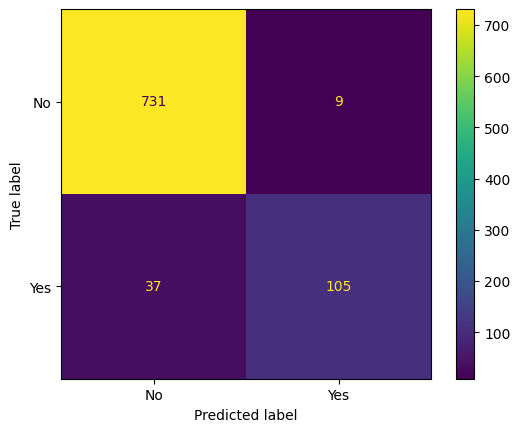

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

model = GradientBoostingClassifier(random_state=43, max_features='sqrt')
# Reusing the preprocessing pipeline
pipeline_grad_boost = Pipeline(steps=[
        ("preprocessing", preproc),
        ("classifier", model)
])
# Removing the scaling step
pipeline_grad_boost.steps[0][1].transformers[0][1].steps.pop(1)

model.get_params().keys()
# Defining hiperparameters to search
param_grid = {
    'classifier__min_samples_split': [8, 10, 12],
    'classifier__min_samples_leaf': [2, 3, 4],
    'classifier__max_depth': [3, 4, 5, 6],
    'classifier__n_estimators': [300, 400, 500],
    'classifier__learning_rate': [0.01, 0.1, 0.5]
}
# Defining the cross validation method
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=43)
scorer = make_scorer(f1_score, average='macro')
gbc_class = RandomizedSearchCV(pipeline_grad_boost, param_grid, cv=cv, scoring=scorer, n_jobs=-1, n_iter=20, random_state=43)

# Fit the model
np.random.seed(43)
gbc_class.fit(X_train, y_train)

# Predict the test set
y_pred = gbc_class.predict(X_test)

# Calculate the accuracy on test set
accuracy = balanced_accuracy_score(y_test, y_pred)

print("Balanced Accuracy:", accuracy)
print("Best params:", gbc_class.best_params_)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dummy.classes_)
plt = disp.plot()



Como ya hemos mencionado previamente, la selección de algunos parámetros a optimizar se ha hecho a base prueba y error. Por ejemplo, el número de hojas máximo por defecto (sin límite) es el óptimo para este modelo, ya que cualquier otro valor reduce el desempeño de nuestro modelo. Ocurre lo mismo con otros parámetros como el mínimo de impureza permitida para realizar una partición y la función de pérdida que se desea minimizar. 

También cabe destacar que los rangos de valores de los hiperparámetros se han seleccionado cuidadosamente, ya que valores altos de la tasa de apredizaje y el número de estimadores pueden provocar sobreajuste y forzar a la validación cruzada a seleccionar valores que no son óptimos.

Este modelo de Gradient Boosting ha conseguido un rendimiento superior al modelo de regresión logística, llegando a un portentaje muy alto de detección de empleados que no van a abandonar la empresa (alrededor del 98%). Nuestro modelo tiende a predecir la clase mayoritaria, pero aún así, generaliza bien para el conjunto test que tenemos. Más adelante, con XGBoost, intentaremos mejorar este resultado, ya que es un modelo más complejo y potente.
#### XGBoost

Balanced Accuracy: 0.8631043014845832
Best params: {'classifier__reg_lambda': 0.5, 'classifier__reg_alpha': 1, 'classifier__n_estimators': 400, 'classifier__max_depth': 8, 'classifier__learning_rate': 0.5}


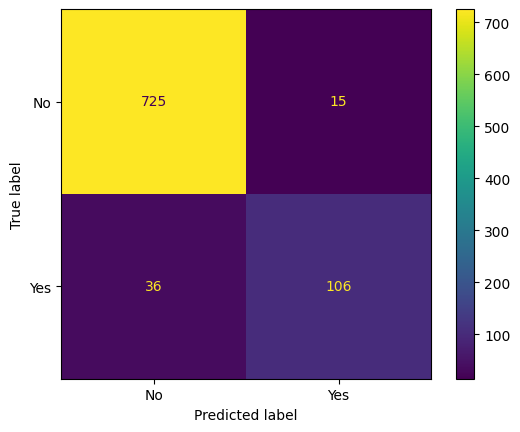

In [97]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Count the number of yes and no
yes = y_train.value_counts()[1]
no = y_train.value_counts()[0]
scale_pos_weight = no/yes 
xgb_classifier = xgb.XGBClassifier( objective='binary:logistic', eval_metric='aucpr', scale_pos_weight=scale_pos_weight, random_state=43)
# Reusing the preprocessing pipeline
pipeline_ext_grad_boost = Pipeline(steps=[
    ("preprocessing", preproc),
    ("classifier", xgb_classifier)
])

param_grid = {
    'classifier__reg_alpha' : [for i in range(0, 5, 3)],
    'classifier__reg_lambda' : [for i in range(0, 3, 0.5)],
    'classifier__n_estimators': [for i in range(100, 500, 100)],
    'classifier__learning_rate': [for i in range(0, 0.5, 0.1)],
    'classifier__max_depth': [for i in range(11)],
    }

# Defining hiperparameters to search
# Defining the cross validation method
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=43)
scorer = make_scorer(f1_score, average='macro')
xgbc_class = RandomizedSearchCV(pipeline_ext_grad_boost, param_grid, cv=cv, scoring=scorer, n_jobs=-1, n_iter=20, random_state=43)

# Fit the model
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
np.random.seed(43)
xgbc_class.fit(X_train, y_train_encoded)

# Predict the test set
y_pred = xgbc_class.predict(X_test)
y_pred = le.inverse_transform(y_pred)

# Calculate the accuracy on test set
accuracy = balanced_accuracy_score(y_test, y_pred)

print("Balanced Accuracy:", accuracy)
print("Best params:", xgbc_class.best_params_)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dummy.classes_)
plt = disp.plot()